In [1]:
import pandas

In [2]:
df_issues_sliced=pandas.DataFrame.from_csv('Sliced_Issues_from_2017-09-10_to_2017-09-19.csv')

/anaconda/envs/tensorenv-3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
import nltk

In [89]:
df_analysis=df_issues_sliced[:10000]

In [4]:
df_issues_sliced['length_of_issue_body']=df_issues_sliced['issue.body'].str.len()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116ae33c8>]], dtype=object)

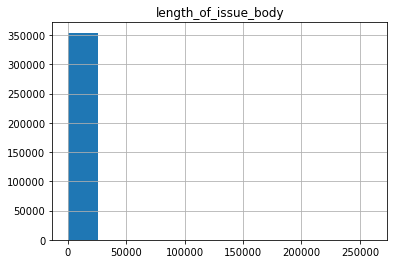

In [10]:
%matplotlib inline
df_issues_sliced.hist(column='length_of_issue_body')

In [44]:
df_issues_sliced_smaller=df_issues_sliced[df_issues_sliced['length_of_issue_body']<=1000].copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d5b5f28>]], dtype=object)

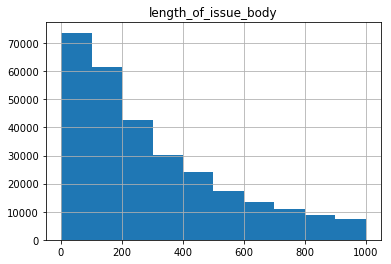

In [45]:
%matplotlib inline
df_issues_sliced_smaller.hist(column='length_of_issue_body')

In [46]:
df_issues_500=df_issues_sliced_smaller[:500].copy()
df_issues_500.to_excel('Issues_500.xlsx')

In [50]:
df_issues_sliced['duplicate_id']=df_issues_sliced.duplicated(subset=['issue.id'])
df_duplicated=df_issues_sliced[df_issues_sliced['duplicate_id']==True]

In [51]:
#df_issues_sliced[df_issues_sliced['action']=='opened']

In [54]:
#Different Analysis of Data

In [90]:
df_analysis=df_analysis[['issue.body']].copy()

In [91]:
df_analysis.dropna(inplace=True)

In [92]:
import nltk

In [93]:
def word_count(text):
    length=0
    try:
        length=len(nltk.word_tokenize(text))
    except:
        print(text)
        
    return length

In [94]:
#WordCount

In [95]:
df_analysis['word_count']=df_analysis['issue.body'].apply(lambda x: word_count(x))

In [96]:
df_analysis['character_count']=df_analysis['issue.body'].str.len()

In [103]:
df_analysis=df_analysis[:1000].copy()

In [107]:
#word length analysis , About 85% of the issues are greater than length>=10
#larger text good fo context
len(df_analysis[df_analysis['word_count']<10])
len(df_analysis[df_analysis['word_count']>=10])

849

In [109]:
#DataFrame sample 100 to find the ratio of code/error/text
df_analysis_code=df_analysis[:100].copy()
df_analysis_code.to_excel('analyze.xlsx')

In [110]:
#Analysis:
# Larger issues, usually have code/Error pasted into them. Traditional NLP wonr work
# On average, if text>50 words:
# main components:
# 1) sysmtem desciption
# 2) Error
# 3) Code Pasted
# 4) Nlp text

#First three constitute a very high portion of the text

In [111]:
#A model to recognize code pasted in the Issues
#Error pasted out in the text, should help in cleaning text

In [84]:
df_analysis=df_analysis[df_analysis['word_count']<=500].copy()

In [88]:
df_analysis[df_analysis['word_count']<=200]

7221

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135d87940>]], dtype=object)

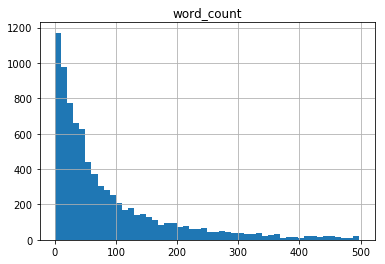

In [86]:
%matplotlib inline
df_analysis.hist(column='word_count',bins=50)